In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../preprocessed_data/df_processed.csv")
df.tail()

,dpm,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,fare_amount,tip_amount,total_amount
35741805,12.916667,2019-12-31 23:20:52,2019-12-31 23:25:16,0.72,1.0,238,5.5,0.00,9.30
35741806,9.387755,2019-12-31 23:09:42,2019-12-31 23:22:39,1.47,1.0,68,10.0,0.00,13.80
35741807,10.886598,2019-12-31 23:46:57,2019-12-31 23:50:54,0.97,1.0,233,5.0,1.76,10.56
35741808,5.381818,2019-12-31 23:22:03,2019-12-31 23:29:06,3.30,1.0,262,11.0,2.96,17.76
35741809,6.967742,2019-12-31 23:33:47,2019-12-31 23:40:10,1.55,1.0,137,7.0,0.00,10.80


In [4]:
# convert datetime string objects into datetime datatype
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [5]:
df.dtypes

dpm                             float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
fare_amount                     float64
tip_amount                      float64
total_amount                    float64
dtype: object

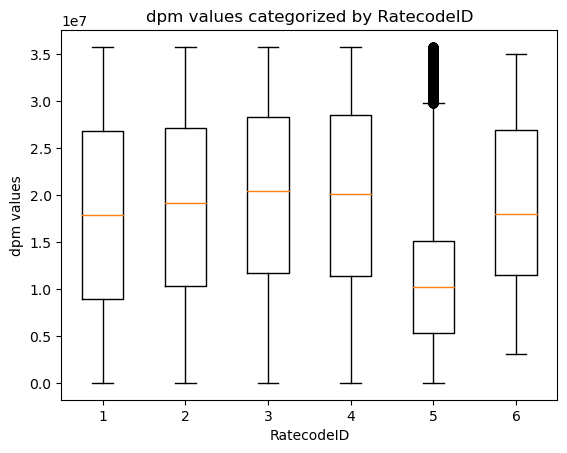

In [7]:
plt.boxplot(df.groupby(['RatecodeID']).groups.values())
plt.xlabel('RatecodeID')
plt.ylabel('dpm values')
plt.title('dpm values categorized by RatecodeID')
plt.savefig("../plots/dpm_byRatecodeID.png")
plt.show()

In [36]:
df = df.loc[df['RatecodeID'] != 5]
print(df['RatecodeID'].unique())

[1. 2. 3. 4. 6.]


In [21]:
groupby_doa_hod = df.groupby([df['tpep_pickup_datetime'].dt.dayofweek,df['tpep_pickup_datetime'].dt.hour])

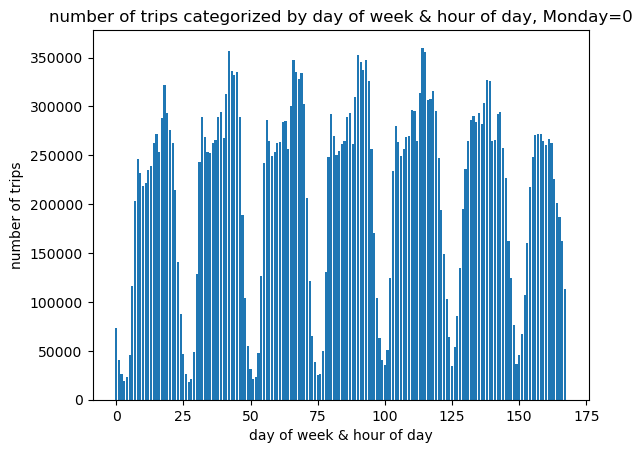

In [22]:
plt.bar(x=np.arange(len(groupby_doa_hod.count()['dpm'].values)), height=groupby_doa_hod.count()['dpm'].values)
plt.xlabel('day of week & hour of day')
plt.ylabel('number of trips')
plt.title('number of trips categorized by day of week & hour of day, Monday=0')
plt.savefig("../plots/ntrips_bydow&hod.png")
plt.show()

In [23]:
groupby_hod = df.groupby([df['tpep_pickup_datetime'].dt.hour])

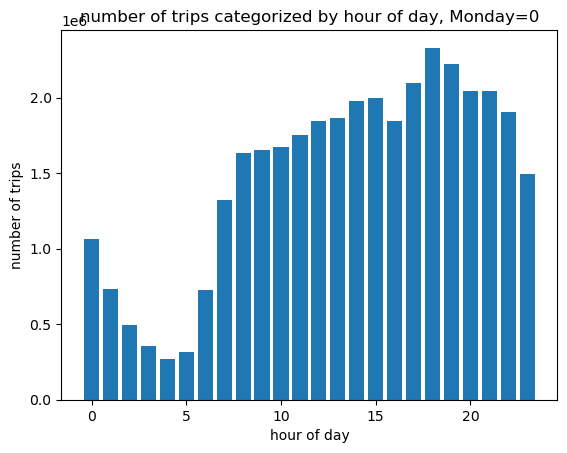

In [24]:
plt.bar(x=np.arange(len(groupby_hod.count()['dpm'].values)), height=groupby_hod.count()['dpm'].values)
plt.xlabel('hour of day')
plt.ylabel('number of trips')
plt.title('number of trips categorized by hour of day, Monday=0')
plt.savefig("../plots/ntrips_byhod.png")
plt.show()

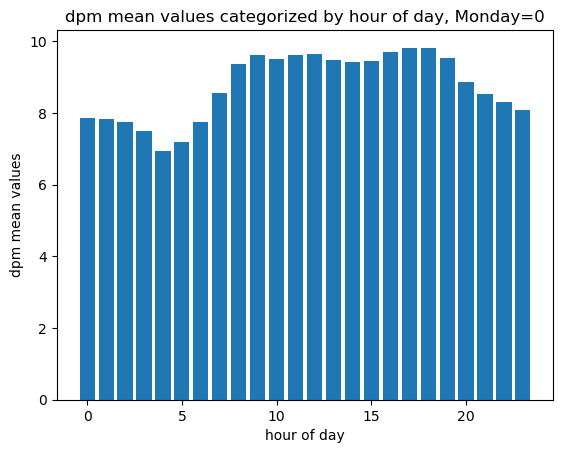

In [25]:
import numpy as np
plt.bar(x=np.arange(len(groupby_hod.groups.keys())), height=groupby_hod.mean()['dpm'].values)
plt.xlabel('hour of day')
plt.ylabel('dpm mean values')
plt.title('dpm mean values categorized by hour of day, Monday=0')
plt.savefig("../plots/dpm-mean_byhod.png")
plt.show()

In [29]:
snow_df = pd.read_csv('../preprocessed_data/SNOW.csv')
snow_df['date'] = pd.to_datetime(snow_df['date'], format='%Y%m%d')
print(snow_df.dtypes)
snow_df.tail()

date     datetime64[ns]
value             int64
dtype: object


,date,value
1155,2019-12-29,0
1156,2019-12-29,0
1157,2019-12-30,0
1158,2019-12-30,0
1159,2019-12-31,0


In [30]:
snow_df = snow_df.loc[snow_df['date'].dt.month.isin([1,2,3,10,11,12])]
snow_df.shape

(625, 2)

In [31]:
snow_df.loc[snow_df['value']>0].groupby(['date']).mean()

,value
date,
2019-01-13,3.000000
2019-01-18,9.750000
2019-01-20,13.000000
2019-01-31,5.333333
2019-02-11,3.000000
2019-02-13,22.666667
2019-02-21,36.750000
2019-02-28,5.500000
2019-03-01,11.500000


In [32]:
positive_snow_index = snow_df.loc[snow_df['value']>0].groupby(['date']).mean().index
positive_snow_index

DatetimeIndex(['2019-01-13', '2019-01-18', '2019-01-20', '2019-01-31',
               '2019-02-11', '2019-02-13', '2019-02-21', '2019-02-28',
               '2019-03-01', '2019-03-02', '2019-03-04', '2019-12-03',
               '2019-12-11', '2019-12-19'],
              dtype='datetime64[ns]', name='date', freq=None)

In [33]:
positive_snow_value = snow_df.loc[snow_df['value']>0].groupby(['date']).mean()['value']

In [41]:
df_has_snow = df.loc[df['tpep_pickup_datetime'].isin(positive_snow_index)]
df_has_snow.shape

(36, 9)

In [48]:
df.loc[df['tpep_pickup_datetime'].isin(positive_snow_index)]

,dpm,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,fare_amount,tip_amount,total_amount
2398201,10.597403,2019-01-31,2019-01-31 00:05:02,0.77,1.0,186,5.5,1.36,8.16
2402080,9.354839,2019-01-31,2019-01-31 00:03:28,0.62,1.0,100,4.5,0.00,5.80
5080399,6.639286,2019-02-11,2019-02-11 00:10:16,2.80,1.0,142,10.5,4.29,18.59
5517836,3.747733,2019-02-13,2019-02-13 00:25:11,18.75,2.0,132,52.0,11.71,70.27
5570021,10.103093,2019-02-13,2019-02-13 09:20:37,0.97,1.0,238,6.5,0.00,9.80
5619110,8.293671,2019-02-13,2019-02-13 15:19:39,3.95,1.0,90,24.0,5.46,32.76
5741769,6.149068,2019-02-13,2019-02-13 22:31:22,3.22,1.0,161,16.0,0.00,19.80
8911605,6.271903,2019-02-28,2019-02-28 00:16:05,3.31,1.0,161,13.5,3.46,20.76
8949518,16.400000,2019-02-28,2019-02-28 08:59:34,0.75,1.0,236,9.0,0.00,12.30
9163764,11.200000,2019-03-01,2019-03-01 00:06:00,1.05,1.0,114,6.0,1.96,11.76


In [42]:
for index in positive_snow_index:
    df.loc[df['tpep_pickup_datetime'].isin(index)]

0          2019-01-01 07:01:20
1          2019-01-03 21:43:46
2          2019-01-03 21:49:22
3          2019-01-03 22:04:40
4          2019-01-03 22:24:36
                   ...        
35741805   2019-12-31 23:20:52
35741806   2019-12-31 23:09:42
35741807   2019-12-31 23:46:57
35741808   2019-12-31 23:22:03
35741809   2019-12-31 23:33:47
Name: tpep_pickup_datetime, Length: 35652775, dtype: datetime64[ns]

In [37]:
df_has_snow.groupby('tpep_pickup_datetime').mean()

,dpm,trip_distance,RatecodeID,PULocationID,fare_amount,tip_amount,total_amount
tpep_pickup_datetime,,,,,,,
2019-01-31,9.976121,0.695000,1.00,143.000000,5.000000,0.680000,6.980000
2019-02-11,6.639286,2.800000,1.00,142.000000,10.500000,4.290000,18.590000
2019-02-13,7.073391,6.722500,1.25,155.250000,24.625000,4.292500,33.157500
2019-02-28,11.335952,2.030000,1.00,198.500000,11.250000,1.730000,16.530000
2019-03-01,7.624492,2.603333,1.00,127.500000,11.500000,1.243333,16.626667
2019-03-02,10.083730,2.036667,1.00,185.666667,10.166667,1.853333,15.820000
2019-03-04,8.648933,1.900000,1.00,125.000000,9.000000,1.633333,15.200000
2019-12-03,4.252632,19.000000,4.00,132.000000,79.500000,0.000000,80.800000
2019-12-11,9.412000,3.155000,1.00,241.500000,14.500000,1.440000,20.115000


In [18]:
df.loc[~(df['tpep_pickup_datetime'].isin(positive_snow_index))].groupby(df['tpep_pickup_datetime'].dt.date).mean()

,dpm,trip_distance,RatecodeID,PULocationID,fare_amount,tip_amount,total_amount
tpep_pickup_datetime,,,,,,,
2019-01-01,6.083333,1.200000,1.000000,48.000000,6.500000,0.000000,7.300000
2019-01-03,7.915000,1.600000,1.000000,203.500000,8.375000,1.675000,10.850000
2019-01-05,7.991453,2.066667,1.000000,159.666667,9.666667,1.866667,12.833333
2019-01-15,7.800000,1.000000,1.000000,223.000000,5.500000,1.000000,7.800000
2019-01-18,8.134147,2.935294,1.058824,175.470588,12.362745,2.166667,15.893333
...,...,...,...,...,...,...,...
2019-12-27,8.781051,3.251106,1.039945,160.349896,13.471163,1.979263,19.360433
2019-12-28,8.445269,3.287042,1.038470,158.004142,13.585845,1.936234,19.129886
2019-12-29,8.342844,3.440034,1.043977,157.865520,13.670657,2.018831,19.318952


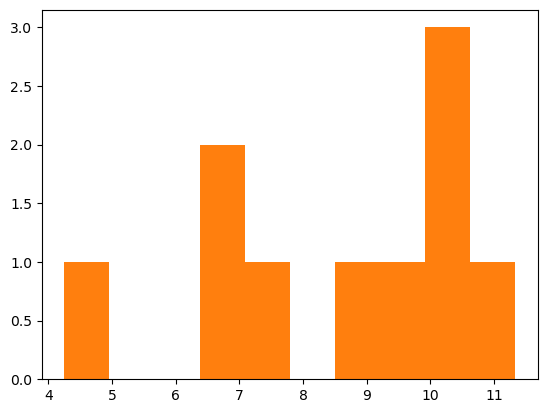

In [20]:
plt.hist(df_has_snow.groupby('tpep_pickup_datetime').mean()['dpm'])
plt.show()

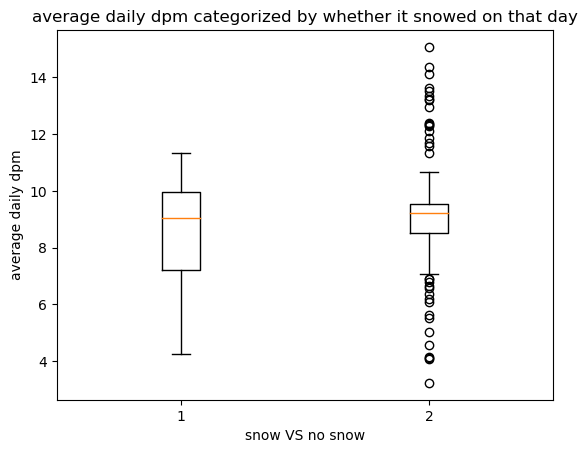

In [38]:
plt.boxplot([df_has_snow.groupby('tpep_pickup_datetime').mean()['dpm'], df.loc[~(df['tpep_pickup_datetime'].isin(positive_snow_index))].groupby(df['tpep_pickup_datetime'].dt.date).mean()['dpm']])
plt.xlabel('snow VS no snow')
plt.ylabel('average daily dpm')
plt.title('average daily dpm categorized by whether it snowed on that day')
plt.savefig("../plots/avedaily_dpm_byYNsnow.png")
plt.show()

In [39]:
df_has_snow.groupby('tpep_pickup_datetime').mean()['dpm'].describe()

count    10.000000
mean      8.501509
std       2.109356
min       4.252632
25%       7.211167
50%       9.030466
75%       9.974229
max      11.335952
Name: dpm, dtype: float64

In [40]:
df.loc[~(df['tpep_pickup_datetime'].isin(positive_snow_index))].groupby(df['tpep_pickup_datetime'].dt.date).mean()['dpm'].describe()

count    222.000000
mean       9.086350
std        1.620762
min        3.231590
25%        8.509832
50%        9.226535
75%        9.552040
max       15.076923
Name: dpm, dtype: float64

In [27]:
df_has_snow.groupby('tpep_pickup_datetime').count()

,dpm,tpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,fare_amount,tip_amount,total_amount
tpep_pickup_datetime,,,,,,,,
2019-01-31,2,2,2,2,2,2,2,2
2019-02-11,1,1,1,1,1,1,1,1
2019-02-13,4,4,4,4,4,4,4,4
2019-02-28,2,2,2,2,2,2,2,2
2019-03-01,6,6,6,6,6,6,6,6
2019-03-02,3,3,3,3,3,3,3,3
2019-03-04,3,3,3,3,3,3,3,3
2019-12-03,1,1,1,1,1,1,1,1
2019-12-11,4,4,4,4,4,4,4,4
